<a href="https://colab.research.google.com/github/Himanshumahajanstd2/LGMVIP-data-science-/blob/main/DEVELOP%20A%20NEURAL%20NETWORK%20THAT%20CAN%20READ%20HANDWRITING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  LGM VIP Internship-Data Science 


# TASK 3- DEVELOP A NEURAL NETWORK THAT CAN READ HANDWRITING


# STEPS TO DEVELOP A NEURAL NETWORK


1.   Import libraries
2.   Load the dataset
3.   Display some images from the dataset
4.   Data Preprocessing
5.   Building the model
8.   Train the model
9.   Model Evaluation
10.  Predictions on test data




# Import libraries


In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K


# Load the dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [ ]:
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


# Display images from the dataset

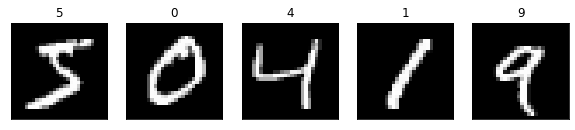

In [ ]:
fig, axes = plt.subplots(ncols=5, sharex=False,
			 sharey=True, figsize=(10, 4))
for i in range(5):
	axes[i].set_title(y_train[i])
	axes[i].imshow(x_train[i], cmap='gray')
	axes[i].get_xaxis().set_visible(False)
	axes[i].get_yaxis().set_visible(False)
plt.show()

# Data Transformation

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)


In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# Building the model

In [ ]:
batch_size = 128
num_classes = 10
epochs = 5
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

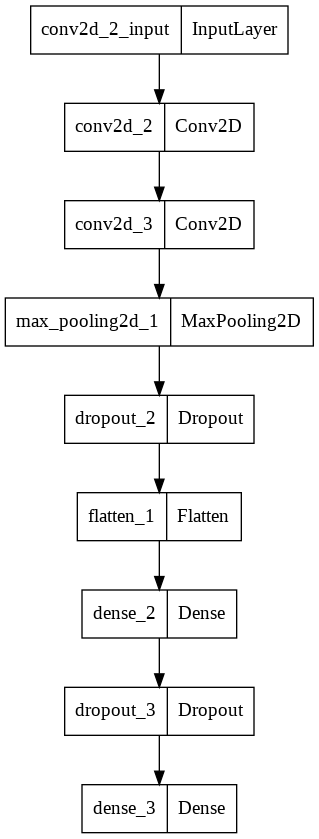

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model)

# Model Compilation

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

# Training the mdoel

In [ ]:
hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")

model.save('mnist.h5')
print("Saving the model as mnist.h5")

Epoch 1/5
469/469 [==============================] - 108s 230ms/step - loss: 2.2801 - accuracy: 0.1432 - val_loss: 2.2434 - val_accuracy: 0.2719
Epoch 2/5
469/469 [==============================] - 101s 216ms/step - loss: 2.2205 - accuracy: 0.2803 - val_loss: 2.1716 - val_accuracy: 0.5593
Epoch 3/5
469/469 [==============================] - 101s 215ms/step - loss: 2.1440 - accuracy: 0.4157 - val_loss: 2.0727 - val_accuracy: 0.6504
Epoch 4/5
469/469 [==============================] - 103s 220ms/step - loss: 2.0342 - accuracy: 0.5101 - val_loss: 1.9295 - val_accuracy: 0.6960
Epoch 5/5
469/469 [==============================] - 105s 225ms/step - loss: 1.8811 - accuracy: 0.5721 - val_loss: 1.7286 - val_accuracy: 0.7347
The model has successfully trained
Saving the model as mnist.h5


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2359552   
                                                      

# Model Evaluation

In [ ]:
print("Evaluate model on test data")
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)



Evaluate model on test data
79/79 [==============================] - 4s 53ms/step - loss: 1.7286 - accuracy: 0.7347
test loss, test acc: [1.7285587787628174, 0.7347000241279602]


# Making Predictions

1/1 [==============================] - 0s 13ms/step
6


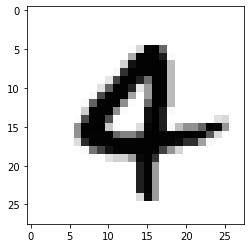

In [ ]:
image_index = 5556
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

1/1 [==============================] - 0s 47ms/step
8


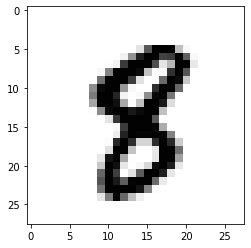

In [ ]:
image_index = 5438
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())